<a href="https://colab.research.google.com/github/anaiy2004/COVID-19-Predictor/blob/master/COVID19CasesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import keras
import pandas
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras import optimizers
import numpy as np
import tensorflow as tf
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pandas.read_csv(url)
inputs = df['cases'].to_numpy()             
outputs = df['deaths'].to_numpy()
df.tail(5)


Using TensorFlow backend.


,date,cases,deaths
173,2020-07-12,3318347,134977
174,2020-07-13,3379859,135402
175,2020-07-14,3445483,136356
176,2020-07-15,3512791,137319
177,2020-07-16,3588462,138268


In [2]:
past = 5
s = (len(inputs) , past  * 2)
betterinputs = np.zeros(s)
betteroutputs = np.zeros(len(inputs))

for i in range(len(inputs) - past):
  temp = np.zeros(past * 2)
  temp[0 : past] = inputs[i : i+ past]
  temp[past:] = outputs[i : i + past] 
  betterinputs[i] = temp
  betteroutputs[i] = inputs[i+past]

In [3]:
betterinputs = betterinputs[0:len(df) - past] 
betteroutputs = betteroutputs[0:len(df) - past]
print(betterinputs[0])

[1. 1. 1. 2. 3. 0. 0. 0. 0. 0.]


In [4]:
split = int(0.8*len(betterinputs))
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2) 

In [5]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(cv=2)
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
model.fit(X_train, y_train)
print("{}".format(np.linalg.norm(model.predict(X_test) - y_test, 1)/len(y_test)))

3883.8951935516006


In [6]:
model.alpha_

10.0

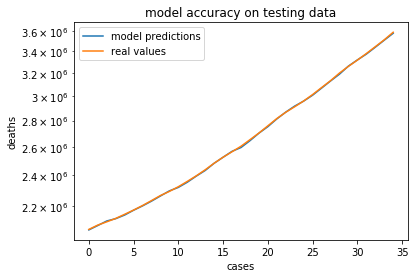

In [8]:
import matplotlib.pyplot as plt

predict = model.predict(X_test)
plt.semilogy(predict, label = "model predictions")
plt.semilogy(y_test , label = "real values")
plt.title('model accuracy on testing data')
plt.ylabel('deaths')
plt.xlabel('cases')
plt.legend()